<img src="../tree/Fig/Logo.jpg" alt="FLAMEGPU" width="600px"/> 

# Welcome to FLAMEGPU2 Tutorial

For the purpose of this tutorial, the Jupyter notebook has been configured to work with FLAMEGPU. The Jupyter notebook is a web based environment for interactive computing.  It is capable of running code in a wide variety of programming languages. Once the instance is up and running, you can simply click on the links, and start the tutorial in the web based environment. The notebook consists of cells which can be of type code or markdown (by default, new cells are created as *code* cells). If the content is code, it will be sent to the kernel for execution and output will be displayed in the footer of the cell. If the content is markdown, it will be rendered as HTML and serves as explanatory text. You can execute the content by clicking the **_Run_** button. 


Note: You can launch the temrinal from the following link:

[FLAME GPU Tutorial Terminal for your instance](../terminals/FLAMETerminal)

or run commands using the exclamation mark. e.g. see below

In [ ]:
!echo "Hello World"

# Getting started with FLAMEGPU

A copy of starting code exists in your `Home` directory. Note: this is not the full FLAMEGPU2 version as all examples other than the predator prey model are omitted. The full version of FLAMEGPU can be downloaded from the [website](www.flamegpu.com).

A typical top-level directory layout is as below:


* __FLAMEGPU:__ contains the templates and XML schemas that are used to generate CUDA GPU code. These should not be modified by the users.
* __bin/x64__ and __bin/linux-x64:__ The location of the console and visualisation binaries for each of the examples. There is a Linux shell script for the example which will start the simulation with an initial states file (and the number of iterations to simulation in console mode)
* __doc:__ The FLAMEGPU technical report and user guide in addition to reports for specific example models.
* __examples:__ The location of the model files for FLAMEGPU examples and the location to create your own models.
* __include:__ Some common include files required by FLAMEGPU
* __lib:__ Any library dependencies required by FLAMEGPU
* __media:__ 3D models used for some of the visualisations
* __tools:__ A number of tools for generating function script files from XML model files and running template code generation in windows.


Note: The FLAME GPU documentation and user guide can be found at [docs.flamegpu.com](http://docs.flamegpu.com), with source hosted on GitHub at `FLAMEGPU/docs`.


We are going to work with the predator-prey model (Section 1,[Tutorial doc](https://drive.google.com/file/d/0B2HbOiEppVPMVFFJcnh5Yzk2eUE/view?usp=sharing)) in the examples folder. Navigate to the `examples/PreyPredator` directory and call `make console` to perform all the the FLAMEGPU code generation and code compilation stages.

In [ ]:
%cd ~/ALifeTutorial/
!mkdir -p build
%cd build
!cmake .. 
!make -j8

This will validate and process the XML model and build a console version of the model in release mode. FLAMEGPU can be executed as either a console application or as an interactive visualisation. Binary files are placed in `bin/linux-x64/<OPT>_<MODE>`, where `<OPT>` is either `Release` or `Debug` and `<MODE>` is `Console` or `Visualisation`. For more info on building the example via `make`, run `make help` in the `examples` directory. 

To run the executable, simply run the script located in `bin/linux-x64`:

In [ ]:
%cd  ~/ALifeTutorial/
!./build/bin/linux-x64/Release/flamegpu2_example -i iterations/0.xml -s 1

An example output would look like below:

```
./PreyPredator_console.sh 
FLAMEGPU Console mode
Initial states: ../../examples/PreyPredator/iterations/0.xml
Output dir: ../../examples/PreyPredator/iterations/
GPU 0: GeForce GTX 1080, SM61, Linux, pciBusId 1
64Bit System Detected
Allocating Host and Device memory
Processing Simulation Step 1
Iteration 1 Saved to XML
Total Processing time: 11.739296 (ms)
```

Examine the run script by looking at the parameters passed to the simulation. The parameters are the initial model file and the number of simulation runs (iterations). Note that by default, the number of iterations is set to 1. 

In order to modify the number of iterations, simply modify the script or change the iteration number by calling the executable directly from the command line. Let's navigate to where the binary file is located and run the binary file as follows:

In [ ]:
%cd  ~/ALifeTutorial/
!./build/bin/linux-x64/Release/flamegpu2_example -i iterations/0.xml -s 10

The output will be a *csv* file `iterations\PreyPred_Count.csv` which will have logged the population counts for the initial state and for the simulation step. Note: XML output is enabled by default. This will create an XML file (saved in the location of the initial input file) for each iteration which will contain the state of the agents after applying a single simulation iteration to the agents (in the same format as `0.xml`). You can view this file from the tutorial directory ([0.xml](http://localhost:8888/edit/examples/PreyPredator/iterations/0.xml)) to see how the agent positions and other properties have changed. 


When executing the binary file, you can modify the input arguments as follows:

__Console mode:__
`./<executable> [-h] [--help] input_path [cuda_device_id] [XML_output_override]`

__Interactive visualisation:__
`./<executable> [-h] [--help] input_path [cuda_device_id]`

, where required arguments are:

* `input_path` : Path to initial states XML file OR path to output XML directory
* `num_iterations` : Number of simulation iterations

and optional arguments are:

* `-h, --help` : Output this help message.
* `cuda_device_id` : CUDA device ID to be used. Default is 0.
* `XML_output_frequency` : Frequency of XML output
    *  `0 = No output`
    *  `1 = Every 1 iteration`
    *  `5 = Every 5 iterations`
    *  `Default value: 1`


For example, if you do not wish to print the XML output, you can disable it by setting the `XML_output_frequency` argument to 0 when running the executable:

In [ ]:
!./PreyPredator ../../../examples/PreyPredator/iterations/iterations/0.xml 10 0 0

# Exercise 01: Building FLAME GPU in notebook

In exercise one, we are going to build and execute the simulation program for the basic Predator-Prey model, followed by plotting the output results. Navigate to the `examples/PreyPredator` directory and run `make`.

In [35]:
%cd ~/ALifeTutorial/build
!make -j8

/home/matt/ALifeTutorial/build
[  3%] Built target tinyxml2
[ 94%] Built target flamegpu2
Scanning dependencies of target flamegpu2_example
[ 96%] Building CUDA object CMakeFiles/flamegpu2_example.dir/src/main.cu.o
/home/matt/ALifeTutorial/build/_deps/thrust-src/cub/block/specializations/../../block/block_exchange.cuh(716): warning #1719-D: the initialization of member "cub::BlockExchange<InputT, BLOCK_DIM_X, ITEMS_PER_THREAD, WARP_TIME_SLICING, BLOCK_DIM_Y, BLOCK_DIM_Z, PTX_ARCH>::lane_id" will be done before that of member "cub::BlockExchange<InputT, BLOCK_DIM_X, ITEMS_PER_THREAD, WARP_TIME_SLICING, BLOCK_DIM_Y, BLOCK_DIM_Z, PTX_ARCH>::warp_id"

/home/matt/ALifeTutorial/build/_deps/thrust-src/cub/device/dispatch/../../agent/agent_histogram.cuh(709): warning #1719-D: the initialization of member "cub::AgentHistogram<AgentHistogramPolicyT, PRIVATIZED_SMEM_BINS, NUM_CHANNELS, NUM_ACTIVE_CHANNELS, SampleIteratorT, CounterT, PrivatizedDecodeOpT, OutputDecodeOpT, OffsetT, PTX_ARCH>::output

## Running the model

Now, run the simulation for 150 iterations:

In [36]:
%cd  ~/ALifeTutorial/
!./build/bin/linux-x64/Release/flamegpu2_example -i iterations/0.xml -s 100

/home/matt/ALifeTutorial
XML file 'iterations/0.xml' loaded.
Num predators: 400
Model initialised, beginning simulation...
577 eaten by 244 
579 eaten by 364 
585 eaten by 170 
546 eaten by 365 
550 eaten by 151 
561 eaten by 320 
565 eaten by 241 
568 eaten by 338 
572 eaten by 358 
512 eaten by 80 
518 eaten by 109 
521 eaten by 239 
534 eaten by 380 
543 eaten by 83 
744 eaten by 127 
746 eaten by 69 
748 eaten by 297 
754 eaten by 98 
760 eaten by 377 
766 eaten by 188 
677 eaten by 24 
683 eaten by 34 
685 eaten by 26 
691 eaten by 150 
696 eaten by 44 
698 eaten by 212 
608 eaten by 93 
613 eaten by 307 
614 eaten by 395 
794 eaten by 156 
797 eaten by 310 
709 eaten by 35 
710 eaten by 343 
723 eaten by 257 
733 eaten by 330 
3 eaten by 281 
23 eaten by 39 
296 eaten by 386 
134 eaten by 69 
142 eaten by 98 
146 eaten by 118 
154 eaten by 399 
640 eaten by 298 
647 eaten by 25 
655 eaten by 109 
657 eaten by 161 
667 eaten by 393 
669 eaten by 331 
416 eaten by 18 
425 eaten by 

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten1942270592 eaten by 1755894528 
454032480 eaten by 14 
1665695744 eaten by 3 
1238009856 eaten by 2038398336 
1478322176 eaten by 56 
1337381504 eaten by 29 
908194304 eaten by 131 
2130914688 eaten by 148 
428596000 eaten by 578887744 
2010108544 eaten by 2038398336 
1406740864 eaten by 390 
434 eaten by 1884182656 
560 eaten by 284 
88 eaten by 154 
215 eaten by 1409518976 
285 eaten by 853123776 
301 eaten by 53151572 
145 eaten by 1289028992 
666 eaten by 1289028992 
2030439552 eaten by 116390992 
628 eaten by 787013696 
631 eaten by 1526130304 
Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten1180425600 eaten by 0 
1457230464 eaten by 116 
2005648000 eaten by 356 
1

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten1605047680 eaten by 192 
1318187648 eaten by 238410400 
899767424 eaten by 380 
1502427392 eaten by 384 
764215232 eaten by 268 
1967512320 eaten by 549149952 
388776992 eaten by 1651063552 
1255384448 eaten by 61606548 
419534816 eaten by 122504904 
634868096 eaten by 2106567040 
371 eaten by 693196416 
930496704 eaten by 366 
298598304 eaten by 324 
1940584832 eaten by 841121024 
1784309632 eaten by 199 
1839272192 eaten by 1437214464 
1772932480 eaten by 305 
1614189824 eaten by 184358512 
476 eaten by 170 
83 eaten by 241 
Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten1098763520 eaten by 93 
617626432 eaten by 38 
1210442880 eaten by 131 
1928956416 eaten by 348505760 
1988646912 eat

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten2133944064 eaten by 25 
632908096 eaten by 1637304576 
897198144 eaten by 1405214976 
2004910976 eaten by 1753187200 
1293463040 eaten by 397 
1025654080 eaten by 280039392 
1653711616 eaten by 598369408 
1758308224 eaten by 170 
1584721280 eaten by 507122720 
1104742656 eaten by 377 
1583737344 eaten by 1454763904 
1791750784 eaten by 270 
1476552448 eaten by 1484528384 
1752713856 eaten by 446230720 
739583168 eaten by 133 
1738502784 eaten by 429707648 
769614208 eaten by 69 
1295274240 eaten by 298 
934847424 eaten by 1560284288 
943066304 eaten by 150 
135521584 eaten by 578887744 
181898528 eaten by 848276736 
740551

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten911806784 eaten by 122504904 
822397120 eaten by 320458336 
2118968320 eaten by 534453248 
724125632 eaten by 136566496 
1889491584 eaten by 3 
792983360 eaten by 355 
1310867840 eaten by 2010926464 
881496768 eaten by 264 
1861142400 eaten by 1926190592 
1224520576 eaten by 2038398336 
1774668416 eaten by 357592352 
116670760 eaten by 1880178560 
18227468 eaten by 1310740352 
638824000 eaten by 70484888 
1534383104 eaten by 1859572352 
382726336 eaten by 639707904 
73177624 eaten by 374 
2098667520 eaten by 578887744 
1795822848 eaten by 1289028992 
1890055040 eaten by 268 
1669514880 eaten by 853123776 
1458285

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten1719006208 eaten by 1837420928 
1889587072 eaten by 71042896 
580760896 eaten by 127 
2001225728 eaten by 242 
1858624768 eaten by 140 
283384000 eaten by 1229870208 
173658384 eaten by 200 
1289991680 eaten by 1741084416 
712447744 eaten by 393 
62489956 eaten by 1260693504 
728037312 eaten by 91 
1792199424 eaten by 1936757888 
616556224 eaten by 358950912 
1007325696 eaten by 12997231

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten132847584 eaten by 295633408 
966911744 eaten by 1437214464 
1170781056 eaten by 2127535360 
1365010304 eaten by 1913446400 
610183424 eaten by 46285132 
1709606144 eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten288403744 eaten by 4

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten1662369664 eaten by 192069888 
184758176 eaten by 503600768 
1340221184 eaten by 978956096 
1782323968 eaten by 1071819392 
587304256 eaten by 46 
917816832 eaten by 503600768 
738348480 eaten by 768782016 
152

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

1559698176 eaten by 379731456 
208154384 eaten by 576387648 
503520256 eaten by 1933869056 
340762496 eaten by 277 
1307234176 eaten by 309923936 
1023041856 eaten by 1205056256 
286081344 eaten by 2047488512 
1308165120 eaten by 1888825984 
132914368 eaten by 1508446208 
1561501696 eaten by 526252288 
1462661120 eaten by 793502720 
2019931648 eaten by 754290048 
860447872 eaten by 281705280 
676562752 eaten by 739226304 
947700352 eaten by 1877276544 
255383616 eaten by 39 
1684068736 eaten by 1505343872 
1050939584 eaten by 22144150 
138797968 eaten by 1151741568 
503074976 eaten by 406591232 
1892636032 eaten by 1498845440 
290006720 eaten by 68863440 
853463040 eaten by 780071168 
564503552 eaten by 120 
1442708224 eaten by 364819648 
551837696 eaten by 576387648 
189676128 eaten by 372823712 
950374912 eaten by 1437112704 
766442688 eaten by 1409518976 
742 eaten by 1065776832 
798 eaten by 447995904 
2097620096 eaten by 543966976 
791023232 eaten by 754290048 
675631744 eaten by 

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

Prey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eatenPrey eaten

449188480 eaten by 404817952 
1480269184 eaten by 82660096 
588 eaten by 437809792 
595 eaten by 149926208 
596 eaten by 329622624 
620 eaten by 697371328 
715 eaten by 767622784 
762 eaten by 1801715840 
1432557824 eaten by 1750520448 
1893029120 eaten by 1216739328 
1347528576 eaten by 136315904 
116033824 eaten by 785796800 
542764992 eaten by 909654400 
335363712 eaten by 1733995008 
1863636352 eaten by 1017925568 
1722325632 eaten by 1111485184 
797839296 eaten by 70440216 
646756096 eaten by 309923936 
1778698880 eaten by 1357236224 
1854991360 eaten by 821990848 
229722416 eaten by 492530272 
205577504 eaten by 1855358720 
623019072 eaten by 1845975936 
1315878656 eaten by 274 
858271168 eaten by 526021600 
2109494272 eaten by 287768768 
1205401088 eaten by 616273408 
1398253184 eaten by 1627412480 
1835206528 eaten by 12371385 
1706198400 eaten by 108570512 
1995100288 eaten by 984583680 
444917216 eaten by 1834502144 
486490336 eaten by 1193589504 
788871936 eaten by 154023104

## Generate and view the graph

The generated *csv* file contains the number of prey and predator agents per iteration. Navigate to the `iterations` folder and plot the result:

/home/matt/ALifeTutorial/iterations


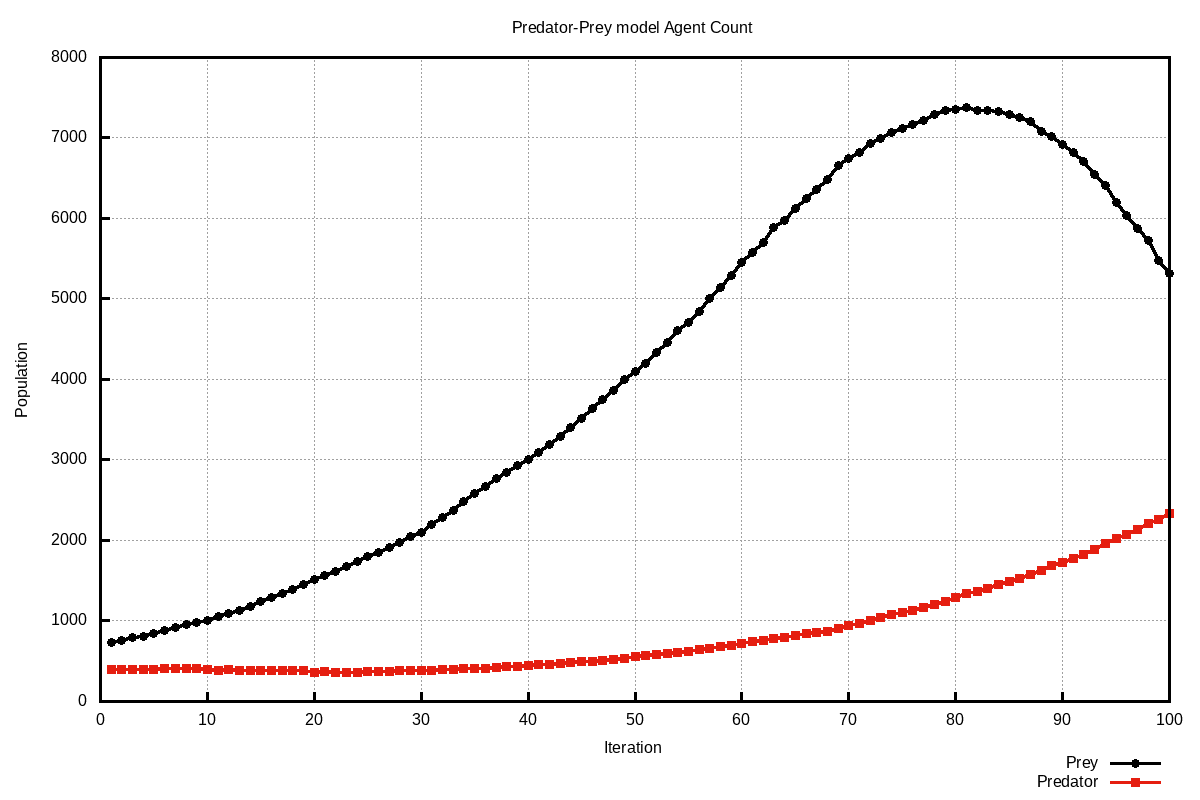

In [37]:
%cd ~/ALifeTutorial/iterations
!gnuplot make_plot_PreyPred.gp 2&>/dev/null
from IPython.display import Image
Image("PreyPredator.png")

   # Exercise 02: Changing Predator-Prey model's behaviour

Now, let's change the parameters in the initial data and see how it affects the behaviour. To generate a new randomised set of initial data `0.xml`, navigate to `XMLGenerator` folder. 

1. Compile and re-run the executable with different parameters:


In [ ]:
%cd ~/Tutorial/examples/PreyPredator/XMLGenerator/
!g++ -std=gnu++11 xmlGen.cpp -o xmlGen
!./xmlGen ../iterations/0.xml 800 400 0.05 0.03 50


, where 800 is the number of predators, 400 is the number of preys, 0.05 and 0.03 are the reproduction rates for both prey and predator, and 50 is the predator's energy gain. 

2. Re-run the executable again for 300 iterations and plot the results. You can observe the predator prey behaviour where both species become extinct after certain number of iterations.

In [ ]:
%cd ~/Tutorial/bin/linux-x64/Release_Console
! ./PreyPredator ../../../examples/PreyPredator/iterations/0.xml 300

Navigate to the `iterations` folder and plot the result: 

In [ ]:
%cd ~/Tutorial/examples/PreyPredator/iterations
!gnuplot make_plot_PreyPred.gp 2&>/dev/null
from IPython.display import Image
Image("PreyPredator.png")

3. Change other parameters or the iteration number to see how the behaviour changes over time. Try to modify the simulation parameters to produce oscillating population dynamics.

   # Exercise 03: Extending the Predator-Prey model (Optional)
In this exercise, we are going to extend our model to include grass. When grass or preys' source of food is included in the model (based on NetLogo's implementation):


* A prey’s energy is reduced by 1 unit each time it moves.
* A prey’s energy increases each time it eats grass.
* A prey dies if it has run out of energy.
* Once eaten, grass regrows after a fixed number of iterations.


With respect to the implementation this will require , a fourth and fifth message type as grass should only be eaten by prey within a certain certain radius. The mechanism for "grazing" is as follows:


1.  Grass agents which currently have grass read the positions of the prey from the location message.
2.  Grass agents read the positions of the prey from the location message. Then, each pick out the messages within the minimum distance and then post the ID of a prey within that distance to the `grass_eaten_message` message. Note that if there is more than 1 prey on within the minimum distance, the grass agent will be eaten by the closest prey.
3.  Grass agents then modify the `active` agent variable to indicate they no longer have grass at this time. The colour also changes from "green" to "navy".
4.  Prey agents read the `grass_eaten_message` message which contain their ID. They then increase their energy accordingly.
5. Prey agents die if they do not have enough life/energy



Below figure shows a dependency graph for the Predator-Prey model with grass: 

<img src="../tree/Fig/prey_pred_grass.jpg" alt="Flow diagram for Predator-Prey model with grass" width="600px"/> 


For simplicity a Grass agent description has already be added to the XML model file with function descriptions matching the behaviour described above. In this exercise, you need to modify the `functions.c` file to add the following behaviour to the functions stubs described below (See [Last Section](#Editing-Files) on how to edit source files):

* 3.1 *__grass_output_location__*: each grass agent outputs a `grass_location` message to provide information. In a more advanced model prey agent can use this information to migrate to areas of high food concentration.
* 3.2 *__grass_eaten__*: each grass agent should iterate over `prey_location_messages` and checks the distance between its location and the prey agent. If the grass is available and the distances less than `GRASS_EAT_DISTANCE`, then the grass is eaten by the closet prey and the regrowth cycle starts. Note that if there are multiple preys within the `GRASS_EAT_DISTANCE`, then the closet prey to the grass, eats it and outputs a message `grass_eaten` containing the ID of the prey who ate it.

Once the grass is eaten, its colour changes (`type` variable is set to a different colour) and it no longer will be available until the `death_cycles` reaches `GRASS_REGROW_CYCLES`). 
* 3.3 *__prey_eat_or_starve__*: each grass agent iterates over `grass_eaten_messages` and checks the ID against it ID. If the grass eaten message indicates that this prey ate some grass then increase the preys life by adding energy. Moreover, if its life is less than 1, it dies.
* 3.4 *__grass_growth__*: If the the `death_cycles` variable is equal to `GRASS_REGROW_CYCLES`, then the grass agent becomes available and the `death_cycles` restarts and the colour will be set to green again. If the grass is not available (meaning the `death_cycles` variable is not equal to `GRASS_REGROW_CYCLES`), then we only increase the `death_cycles` variable.

In the case where grass is included, prey agents require an energy (`life`) variable similar to predators. This variable is randomly selected from the interval of [0,50]. The grass agent initial colour is set to "green". Once eaten, the `available` variable is set to 0 and it takes up to `GRASS_REGROW_CYCLES` iterations till the grass re-grow. 

Now, generate a new initial data file using below parameters:

In [ ]:
%cd  ~/Tutorial/examples/PreyPredator/XMLGenerator/
!g++ -std=gnu++11 xmlGen_IncGrass.cpp -o xmlGenEx3
!./xmlGenEx3 ../iterations/0.xml 800 400 2000 0.05 0.03 75 50 100

, where 800 is the number of preys, 400 is the number of predators, 2000 is the number of grass, 0.05 and 0.03 are the reproduction rates for both prey and predator, 75 is the prey's energy gain, and 50 is the predator's energy gain. 


Re-build the model via `make console`:

In [ ]:
%cd ~/Tutorial/examples/PreyPredator
!make console

Now, run the simulation for 600 iterations:

In [ ]:
%cd ~/Tutorial/bin/linux-x64/Release_Console
!./PreyPredator ../../../examples/PreyPredator/iterations/0.xml 600 0 0

Now, plot your results by running below cell. Your plot should be similar to below figure:

<img src="../tree/Fig/prey_predator_grass.jpg" alt="Examples of predator-prey model simulation with grass included" width="600px"/> 

In [ ]:
%cd ~/Tutorial/examples/PreyPredator/iterations
!gnuplot make_plot_PreyPred_IncGrass.gp 2&>/dev/null
from IPython.display import Image
Image("PreyPredator.png")

## Experimenting with the Model
Try changing the parameters to see how this will change the behaviour of the agents causing the behaviours to change. If you have completed all the above exercises then try modifying the model file and functions file to allow prey agents to migrate to areas of high concentrations of food. You can implement this by adding an additional velocity term to the preys steering velocity and by allowing the prey agents to query the `grass_location` messages.

For more information on FLAMEGPU see the [FLAMEGPU website](www.flamegpu.com) and the documentation which gives detailed instructions on all aspects of FLAMEGPU modelling. More examples can be found on [FLAMEGPU GitHub repository](https://github.com/FLAMEGPU/FLAMEGPU.git).

You can download the solutions from GitHub by checking out the `Exercise_3_solution` branch. E.g. 

In [ ]:
!git clone https://github.com/FLAMEGPU/tutorial -b Exercise_3_solution

# Editing Files

You can use Jupyter to edit model files. Use this link to explore the [turorial directory](../tree) or use below links to open the model file, functions file or initial model data directory for editing:

* [Model.xml](../edit/examples/PreyPredator/src/model/XMLModelFile.xml)
* [Functions.c](../edit/examples/PreyPredator/src/model/functions.c)
* [0.xml](../edit/examples/PreyPredator/iterations/0.xml)

Note: You are given 3, 2-hour sessions for this tutorial. Save and download your modifed files before the end of each session.
